## Explaratory Data Analysis


### Import Libraries 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot styling
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


### Loading Datasets 


In [4]:
df = pd.read_csv("../dataset/paysim_sample_100k.csv")   

### Basic Overview

In [5]:
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Summary Statistics ---")
print(df.describe())

print("\n--- Missing Values ---")
print(df.isnull().sum())



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100000 non-null  int64  
 1   type            100000 non-null  object 
 2   amount          100000 non-null  float64
 3   nameOrig        100000 non-null  object 
 4   oldbalanceOrg   100000 non-null  float64
 5   newbalanceOrig  100000 non-null  float64
 6   nameDest        100000 non-null  object 
 7   oldbalanceDest  100000 non-null  float64
 8   newbalanceDest  100000 non-null  float64
 9   isFraud         100000 non-null  int64  
 10  isFlaggedFraud  100000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 8.4+ MB
None

--- Summary Statistics ---
                step        amount  oldbalanceOrg  newbalanceOrig  \
count  100000.000000  1.000000e+05   1.000000e+05    1.000000e+05   
mean       39.500300  2.868992e+05   

### Fraud vs Non-Fraud Distribution

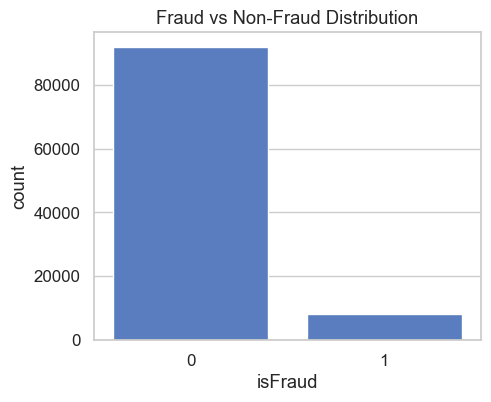

Fraud Percentage: 8.21%


In [6]:
plt.figure(figsize=(5,4))
sns.countplot(x="isFraud", data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()

fraud_percentage = df['isFraud'].mean() * 100
print(f"Fraud Percentage: {fraud_percentage:.2f}%")


### Transaction Type Analysis

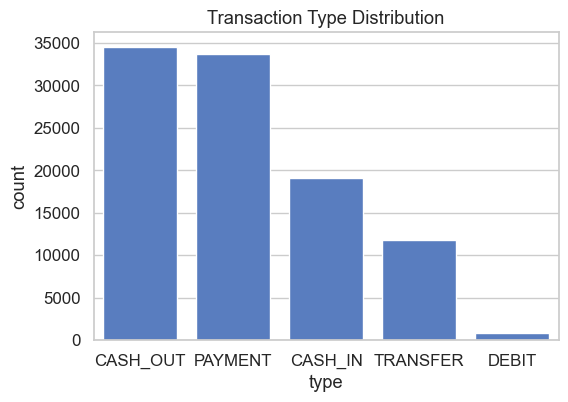


--- Fraud Rates by Transaction Type ---
type
TRANSFER    0.346733
CASH_OUT    0.119066
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x="type", data=df, order=df['type'].value_counts().index)
plt.title("Transaction Type Distribution")
plt.show()

fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
print("\n--- Fraud Rates by Transaction Type ---")
print(fraud_by_type)


### Transaction Amount Distribution

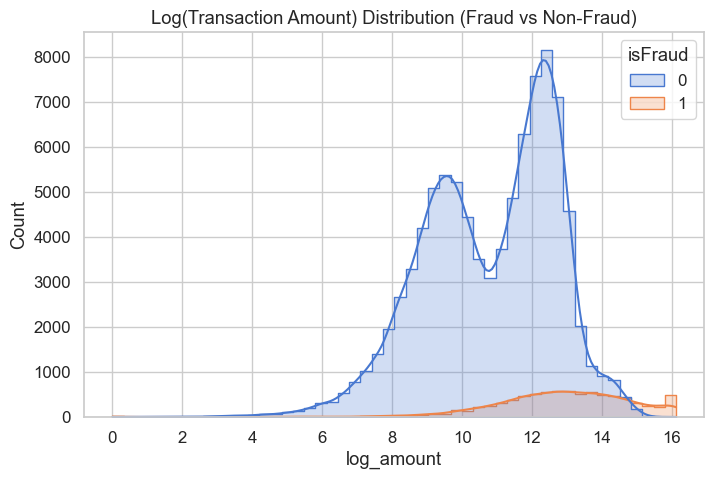

In [8]:
# Add log-transformed amount column
df["log_amount"] = np.log1p(df["amount"])

# Plot using the dataframe
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="log_amount", bins=50, hue="isFraud", kde=True, element="step")
plt.title("Log(Transaction Amount) Distribution (Fraud vs Non-Fraud)")
plt.show()


### Balance Behavior (Origin & Destination)

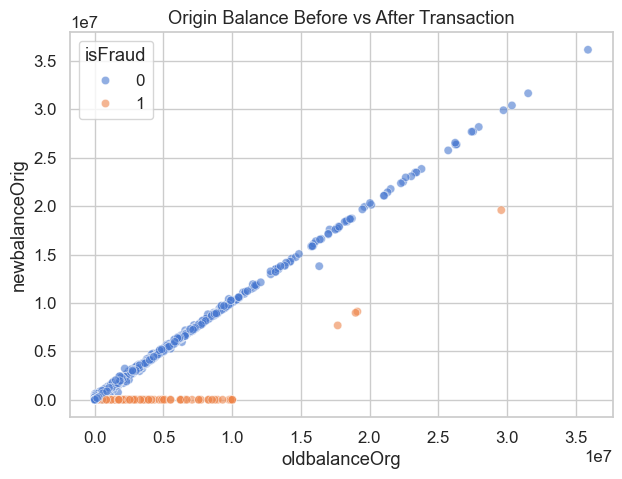

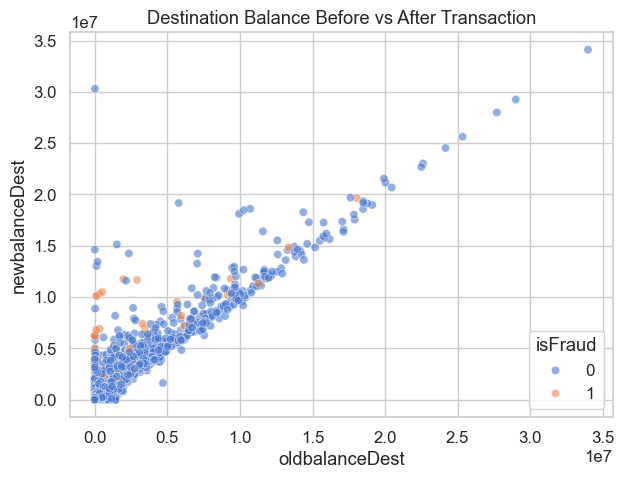

In [9]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="oldbalanceOrg", y="newbalanceOrig", hue="isFraud", 
                data=df.sample(5000, random_state=42), alpha=0.6)
plt.title("Origin Balance Before vs After Transaction")
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(x="oldbalanceDest", y="newbalanceDest", hue="isFraud", 
                data=df.sample(5000, random_state=42), alpha=0.6)
plt.title("Destination Balance Before vs After Transaction")
plt.show()


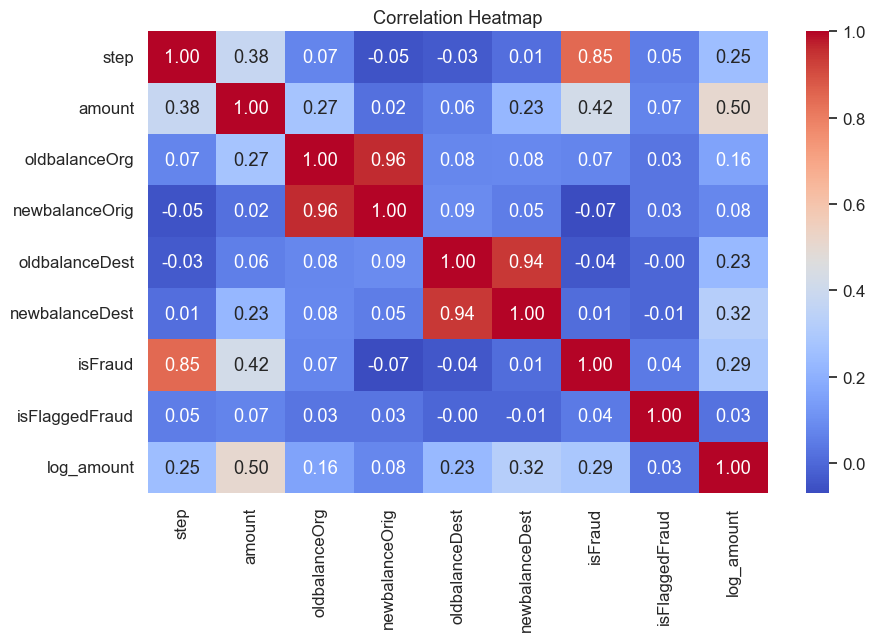

In [10]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
